# Renormalización a cualquier año para datos de producción de la OCDE

Los datos de la [OCDE](https://data.oecd.org/chart/4JL6) sobre producción de ciertos paises están normalizados en 100 al año 2010. Me he bajado el fichero de cvs para unos cuantos países.

In [6]:
import requests
import io
import operator
import csv

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import plotly.plotly as py
import cufflinks as cf
from scipy import stats
cf.set_config_file(offline=False, world_readable=True, theme='ggplot')
%matplotlib inline
nombre_file="DP_LIVE_16022017112046365.csv";
datos=[]
with open(nombre_file) as csvarchivo:
    entrada = csv.DictReader(csvarchivo)
    for fila in entrada:
        datos.append(fila)





Para cuando lo ejecutes en el Jupyter he añadido un control y botón para que elijas años y puedas añadir el gráfico que se genera al normalizar la producción a otro año diferente. Muestro unos cuantos gráficos de ejemplo.

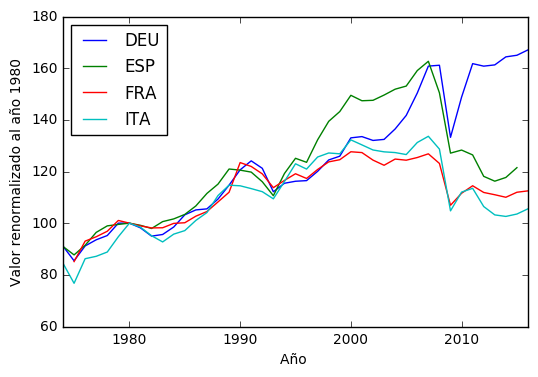

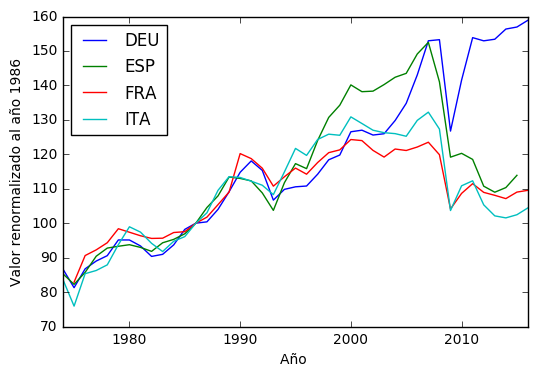

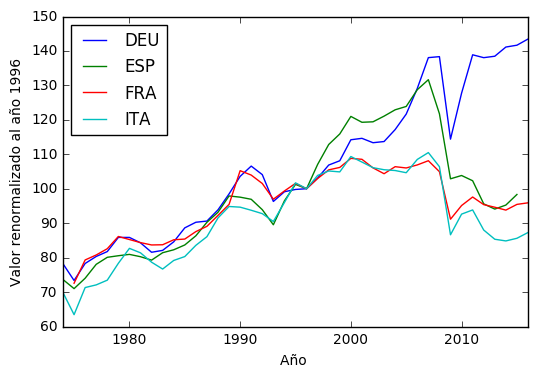

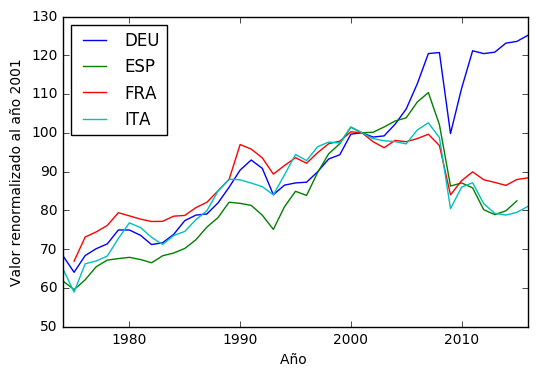

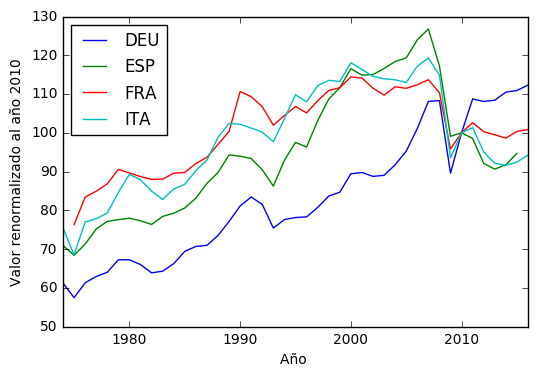

In [45]:
from IPython.display import Image, display, clear_output
w = IntSlider(min=1975,max=2015)
display(w)
button = widgets.Button(description="Añade")
display(button)
button.on_click(plotData)

def plotData(b):
    year_renorm=str(w.value)
    datos_finish_ESP=[];
    datos_finish_DEU=[];
    datos_finish_FRA=[];
    datos_finish_ITA=[];
    datos_year_ESP={};
    datos_year_DEU={};
    datos_year_FRA={};
    datos_year_ITA={};
    min_year=10000;
    max_year=0;
    renorm_ESP=0;
    renorm_DEU=0;
    renorm_FRA=0;
    renorm_ITA=0;
    for d in range(1,len(datos)):
        dato=datos[d];
        if (dato['\ufeff"LOCATION"']=="ESP"):
            datos_finish_ESP.append(dato)
            time_data=int(dato['TIME'])
            if (time_data<min_year):
                min_year=time_data
            if (time_data>max_year):
                max_year=time_data
            datos_year_ESP[time_data]=float(dato['Value'])
            if dato['TIME']==year_renorm:
                renorm_ESP=float(dato['Value'])
        elif (dato['\ufeff"LOCATION"']=="FRA"):
            datos_finish_FRA.append(dato)
            time_data=int(dato['TIME'])
            if (time_data<min_year):
                min_year=time_data
            if (time_data>max_year):
                max_year=time_data
            datos_year_FRA[time_data]=float(dato['Value'])
            if dato['TIME']==year_renorm:
                renorm_FRA=float(dato['Value'])
        elif (dato['\ufeff"LOCATION"']=="DEU"):
            datos_finish_DEU.append(dato)
            time_data=int(dato['TIME'])
            if (time_data<min_year):
                min_year=time_data
            if (time_data>max_year):
                max_year=time_data
            datos_year_DEU[time_data]=float(dato['Value'])
            if dato['TIME']==year_renorm:
                renorm_DEU=float(dato['Value'])
        elif (dato['\ufeff"LOCATION"']=="ITA"):
            datos_finish_ITA.append(dato)
            time_data=int(dato['TIME'])
            if (time_data<min_year):
                min_year=time_data
            if (time_data>max_year):
                max_year=time_data
            datos_year_ITA[time_data]=float(dato['Value'])
            if dato['TIME']==year_renorm:
                renorm_ITA=float(dato['Value'])
    #renormalizamos
    for d in range(min_year,max_year+1):
        if (d in datos_year_ESP.keys()):
            datos_year_ESP[d]=datos_year_ESP[d]*100/renorm_ESP;
        else:
            datos_year_ESP[d]=np.nan
        if (d in datos_year_FRA.keys()):
            datos_year_FRA[d]=datos_year_FRA[d]*100/renorm_FRA;
        else:
            datos_year_FRA[d]=np.nan
        if (d in datos_year_DEU.keys()):
            datos_year_DEU[d]=datos_year_DEU[d]*100/renorm_DEU;
        else:
            datos_year_DEU[d]=np.nan
        if (d in datos_year_ITA.keys()):
            datos_year_ITA[d]=datos_year_ITA[d]*100/renorm_ITA;
        else:
            datos_year_ITA[d]=np.nan

    #gráfico de barras de cada genero
    datasdf={"ESP":datos_year_ESP,"DEU":datos_year_DEU,"FRA":datos_year_FRA,"ITA":datos_year_ITA}
    df = pd.DataFrame(data=datasdf,index=range(min_year,max_year+1))
    df.head()
    genero_plot = df.plot(kind='line',label='Gráfico renormalizado al año '+year_renorm)
    genero_plot.set_ylabel("Valor renormalizado al año "+year_renorm)
    genero_plot.set_xlabel("Año ")


    
    
